In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
print(df.head())
print(df.info())
print(df['Attrition'].value_counts())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

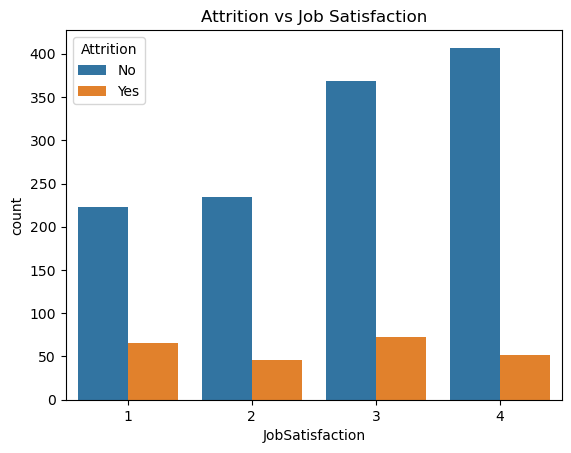

In [7]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Attrition vs Job Satisfaction")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [23]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = df.drop("Attrition", axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression with class_weight
lr_model = LogisticRegression(max_iter=5000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       255
           1       0.26      0.62      0.37        39

    accuracy                           0.72       294
   macro avg       0.59      0.67      0.59       294
weighted avg       0.84      0.72      0.76       294



In [39]:
print("X_test_df shape:", X_test_df.shape)

shap_values = explainer.shap_values(X_test_df)
print("shap_values[0] shape:", shap_values[0].shape)
print("shap_values[1] shape:", shap_values[1].shape)



X_test_df shape: (294, 34)
shap_values[0] shape: (34, 2)
shap_values[1] shape: (34, 2)


<Figure size 640x480 with 0 Axes>

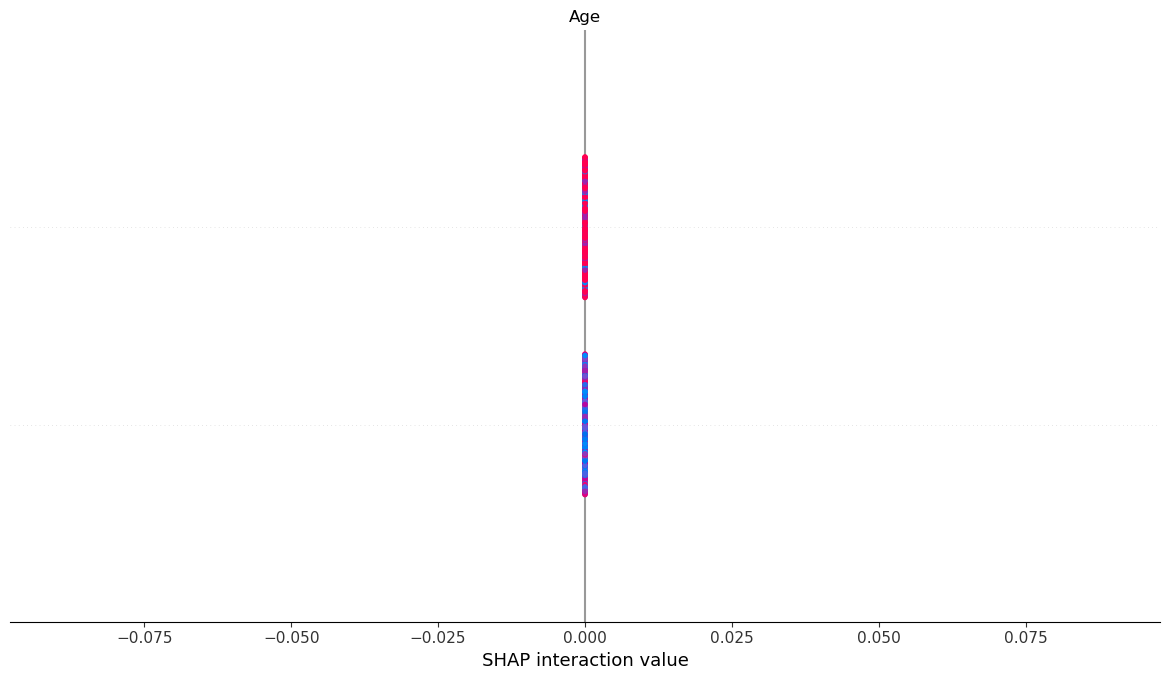

In [41]:
import shap

# TreeExplainer for RandomForest (tree-based models only)
explainer = shap.Explainer(rf_model, X_train, feature_names=X.columns)
shap_values = explainer(X_test_df)

# Summary plot
shap.summary_plot(shap_values, X_test_df)
